## Note: This is a sample solution for the project. Projects will NOT be graded on the basis of how well the submission matches this sample solution. Projects will be graded on the basis of the rubric only.

# Problem Statement

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

1. Explore the dataset and extract insights using Exploratory Data Analysis.

2. Do the users spend more time on the new landing page than the existing landing page?

3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

5. Is the time spent on the new page same for the different language users?


*Consider a significance level of 0.05 for all tests.

The  idea  behind  answering  these  questions  is  to  decide  whether  the  new  page  is  effective  enough  to  gather  new subscribers for the news portal. We will perform the statistical analysis on the collected data to make the business decision.


# Data Dictionary

1. user_id - This represents the user ID of the person visiting the website.

2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).

3. landing_page - This represents whether the landing page is new or old.

4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.

5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.

6. language_preferred - This represents the language chosen by the user to view the landing page.

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 1. Explore the dataset and extract insights using Exploratory Data Analysis.

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [2]:
df = pd.read_csv('abtest.csv')

### View the first and last 5 rows of the dataset

In [3]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


### Understand the shape of the dataset

In [5]:
df.shape

(100, 6)

* The dataset has 100 rows and 6 columns.

### Check the data types of the columns for the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


* There are total 100 non-null observations in each of the columns.

* There are 6 columns named **'user_id', 'group', 'landing_page', 'time_spent_on_the_page', 'converted', 'language_preferred'** whose data types are **int64, object, object, float64, object, object** respectively.


* 'group', 'landing_page', 'converted', and 'language_preferred' are objects, we can change them to categories.

### Fixing the data types

`converting "objects" to "category" reduces the space required to store the DataFrame. It also helps in analysis`

In [7]:
df['group'] = df['group'].astype('category')
df['landing_page'] = df['landing_page'].astype('category')
df['converted'] = df['converted'].astype('category')
df['language_preferred'] = df['language_preferred'].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


### Check for missing values

In [9]:
df.isna().sum()   #null value check

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

* There are no missing values in any of the column

### Check for duplicates

In [10]:
df.duplicated().sum()

0

* There are no duplicated entries in the dataset

### Five point summary of continuous variables

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


* The user_id column contains the user ID of the person visiting the page.
* The maximum time spent on the landing page is less than 11 minutes.
* The mean time spent on the landing page is approximately 5.4 minutes.
* The median time spent on the landing page is approximately 5.4 minutes.

### Summary of categorical variables

In [12]:
df.describe(include = ['category']).T

,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,new,50
converted,100,2,yes,54
language_preferred,100,3,French,34


In [13]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

In [14]:
df['landing_page'].value_counts()

new    50
old    50
Name: landing_page, dtype: int64

In [15]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

In [16]:
df['language_preferred'].value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

* There are 100 unique users.
* There are 2 unique groups - control and treatment. Each group consists of 50 users.
* There are 2 landing_pages - new and old.
* Overall, 55 users get converted and 45 users do not get converted after visiting the landing page.
* There are 3 unique preferred languages - English, French, and Spanish.

### Univariate Analysis

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Time spent on the page

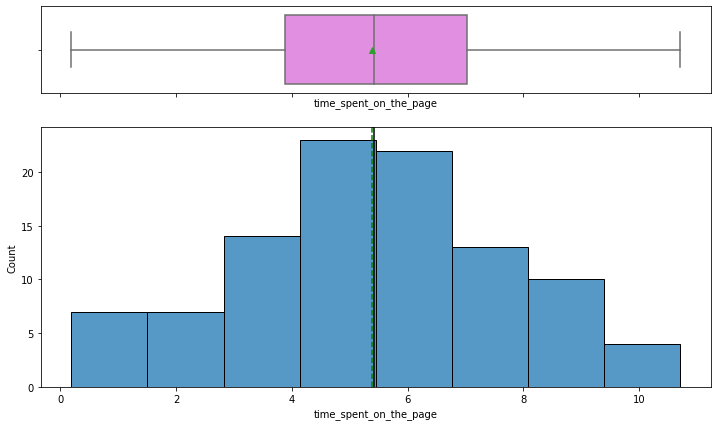

In [18]:
histogram_boxplot(df,"time_spent_on_the_page")

* The time spent on the page looks to have a fairly normal distribution.
* There are no outliers in this column.

In [19]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

#### Group

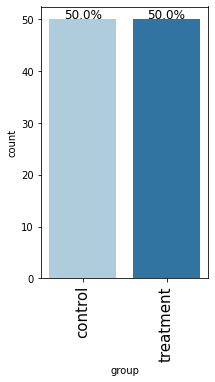

In [20]:
labeled_barplot(df,'group',perc = True)

* The distribution of observations across groups are the same.

#### Landing page

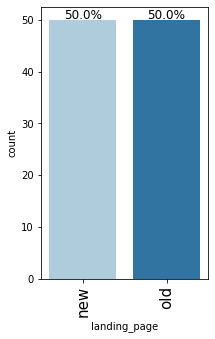

In [21]:
labeled_barplot(df,'landing_page',perc=True)

* The distribution of observations across the two landing pages are same.

#### Converted

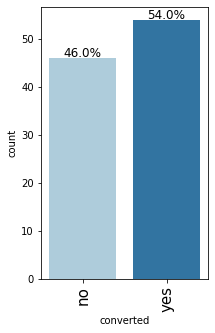

In [22]:
labeled_barplot(df,'converted',perc=True)

* 54% of the users get converted after visiting the landing page.
* 46% of the users do not get converted after visiting the landing page.

#### Preferred language

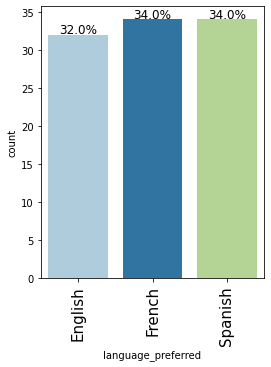

In [23]:
labeled_barplot(df,'language_preferred',perc=True)

* The distribution of observations across various preferred languages is fairly uniform.

### Bivariate Analysis

#### Landing page vs Time spent on the page

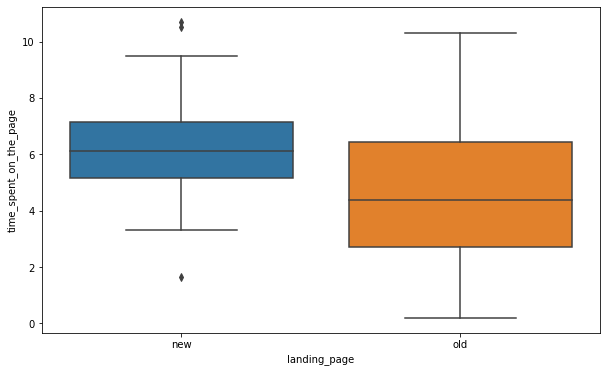

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

* Overall, the time spent on the new page seems to be greater than the time spent on the old page.

#### Conversion status vs Time spent on the page

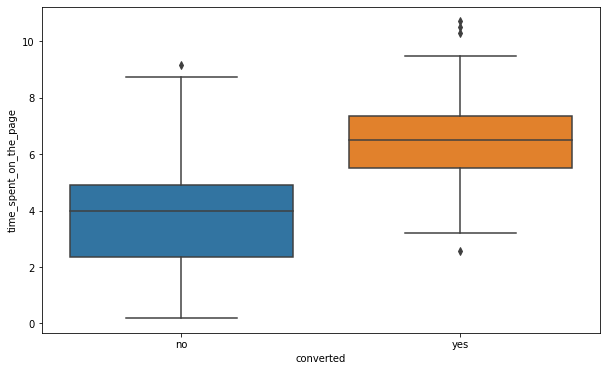

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='converted',y='time_spent_on_the_page')
plt.show()

* Overall, the users who get converted seem to spend more time on the page. 

#### Preferred language vs Time spent on the page

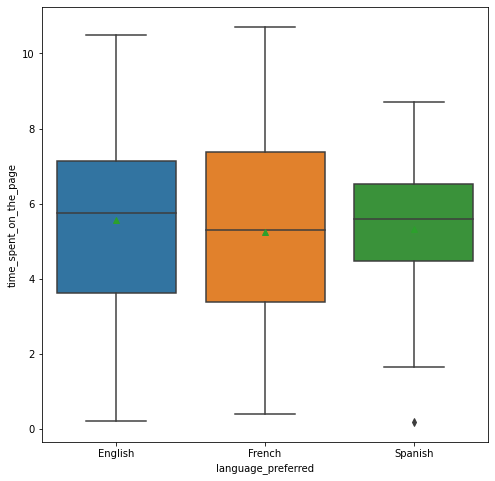

In [26]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df)
plt.show()

* The median time spent by the different language users are approximately equal.
* The mean time spent by the different language users are approximately equal.

## 2. Do the users spend more time on the new landing page than the existing landing page?

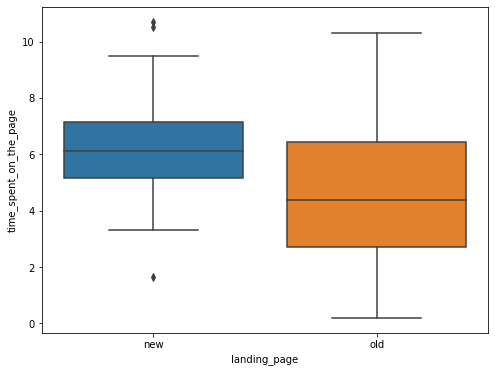

In [27]:
# visual analysis of the time spent on the new page
# and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

By observing the above plot, we can say that overall people spent more times on the new page than the old age. Let's perform a hypothesis test to see if there are enough statistical evidence to support our observation.

## Step 1: Define the null and alternative hypotheses

$H_0:$ The mean time spent by the users on the new page is equal to the mean time spent by the users on the old page.

$H_a:$ The mean time spent by the users on the new page is greater than the mean time spent by the users on the old page.

Let $\mu_1$ and $\mu_2$ be the mean time spent by the users on the new and old page respectively.

Mathematically, the above formulated hypotheses can be written as:

$H_0: \mu_1 = \mu_2$

$H_a: \mu_1 > \mu_2$

## Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.

## Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

## Step 4: Collect and prepare data

In [28]:
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [29]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


As the sample standard deviations are different, the population standard deviations may be assumed to be different.

## Step 5: Calculate the p-value

In [30]:
# import the required function
from scipy.stats import ttest_ind
# find the p-value
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')
print('The p-value is', p_value)

The p-value is 0.0001392381225166549


## Step 6: Compare the p-value with $\alpha$

In [31]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


## Step 7:  Draw inference

Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the mean time spent by the users on the new page is greater than the mean time spent by the users on the old page.

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

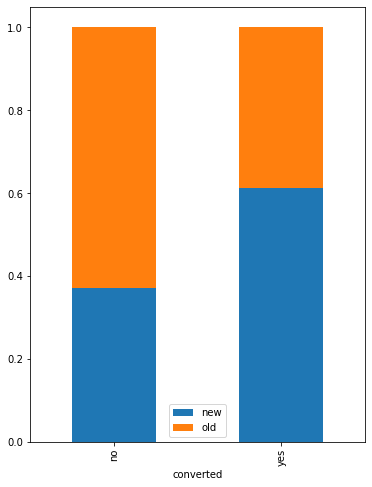

In [32]:
# visual analysis of the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(df['converted'],df['landing_page'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

By observing the above plot, we can say that overall the number of users who get converted is more for the new page than the old page. Let's perform a hypothesis test to see if there is enough statistical evidence to say that the conversion rate for the new page is greater than the old page.

## Step 1: Define the null and alternative hypotheses

$H_0:$ The conversion rate for the new page is equal to the conversion rate for the old page.

$H_a:$ The conversion rate for the new page is greater than the conversion rate for the old page.

Let $p_1$ and $p_2$ be the conversion rate for the new and old page respectively.

Mathematically, the above formulated hypotheses can be written as:

$H_0: p_1 = p_2$

$H_a: p_1 > p_2$

## Step 2: Select Appropriate test

This is a one-tailed test concerning two population proportions from two independent populations. Hence, the two proportion z-test will be the appropriate test for this problem.

## Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

## Step 4: Collect and prepare data

In [33]:
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']
print('The numbers of converted users for the new and old pages are {0} and {1} respectively'.format(new_converted, old_converted))
n_control = df.group.value_counts()['control'] # number of users in the control group
n_treatment = df.group.value_counts()['treatment'] #number of users in the treatment group
print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of converted users for the new and old pages are 33 and 21 respectively
The numbers of users served the new and old pages are 50 and 50 respectively


## Step 5: Calculate the p-value

In [34]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest

# find the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative = 'larger')
print('The p-value is', p_value)

The p-value is 0.008026308204056278


## Step 6: Compare the p-value with $\alpha$

In [35]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


## Step 7:  Draw inference

Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the conversion rate for the new page is greater than the conversion rate for the old page.

## 4. Is the conversion and preferred language are independent or related?

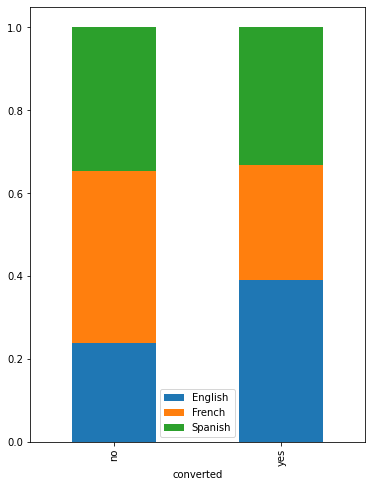

In [36]:
# visual analysis of the dependency between conversion status and preferred langauge
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8),
                 stacked=True)
plt.legend()
plt.show()

The distribution of conversion status for English and French language users is not uniformly distributed. Let's perform the hypothesis test to check whether we have enough statistical evidence to say that the conversion status and preferred language are independent or not.

## Step 1: Define the null and alternative hypotheses

$H_0:$ The converted status is independent of the preferred language.

$H_a:$ The converted status is not independent of the preferred language.

## Step 2: Select Appropriate test

This is a problem of Chi-square test of independence, concerning the two independent categorical variables, converted status and preferred language.

## Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

## Step 4: Collect and prepare data

In [37]:
# create the contingency table showing the distribution of two categorical variables
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


## Step 5: Calculate the p-value

In [38]:
#import the required function
from scipy.stats import chi2_contingency
# use chi2_contingency() to find the p-value
chi_2, p_value, dof, exp_freq = chi2_contingency(contingency_table)
# print the p-value
print('The p-value is', p_value)

The p-value is 0.21298887487543447


## Step 6: Compare the p-value with $\alpha$

In [39]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


## Step 7:  Draw inference

Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that the converted status depends on the preferred language.

## 5. Is the time spent on the new page same for the different language users?

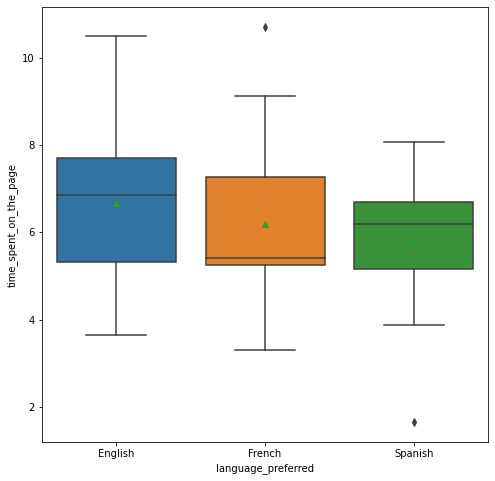

In [40]:
# visual analysis of the mean time spent on the new page for different language users
plt.figure(figsize=(8,8))
# create a new DataFrame for users served the new page
df_new = df[df['landing_page'] == 'new']
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()

In [41]:
# Checking the mean time spent on the new page for different language users
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

The mean time spent on the new page by English users is a bit higher than the mean time spent by French and Spanish users, but we need to test if this difference is statistically significant or not. 

## Step 1: Define the null and alternative hypotheses

$H_0:$ The mean times spent on the new page by English, French, and Spanish users are equal.

$H_a:$ At least one of the mean times spent on the new page by English, French, and Spanish users is unequal.

## Step 2: Select Appropriate test

This is a problem, concerning three population means. One-way ANOVA could be the appropriate test here provided normality and equality of variance assumptions are verified.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the new page follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on the new page does not follow a normal distribution

In [43]:
# Assumption 1: Normality
# import the required function
from scipy.stats import shapiro

# find the p-value
w, p_value = shapiro(df_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [44]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page'], 
                             df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page'], 
                             df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

## Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

## Step 4: Collect and prepare data

In [45]:
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_French = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']
time_spent_Spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']

## Step 5: Calculate the p-value

In [46]:
# import the required function
from scipy.stats import f_oneway
# find the p-value
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)
# print the p-value
print('The p-value is', p_value)

The p-value is 0.43204138694325955


In [47]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


## Step 7:  Draw inference

Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that the mean times spent on the new page by English, French, and Spanish users differ to any meaningful degree.

## Conclusion

- The users spend more time on the new page.

- The conversion rate for the new page is greater than the conversion rate of the old page. 

- The conversion status is independent of the preferred language.

- Based on the conclusions of the hypothesis tests, you can recommend that the news company should use the new landing page to gather more subscribers.

- The longer a visitor spends on a site, the more likely he/she is to convert. So, the business logic would appear to be: design a page that people spend time in, conversion will follow. 